In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#To tune the model
from sklearn.model_selection import GridSearchCV

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

In [2]:
# loading datasets

train = pd.read_csv("census-income-training.csv")
test = pd.read_csv("census-income-test.csv")

In [3]:
train.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,year,income_morethan_50K,Id
0,49,Private,43,2,Doctorate degree(PhD EdD),0,Not in universe,Married-civilian spouse present,Education,Executive admin and managerial,...,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,1,1
1,49,Private,45,12,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Other professional services,Professional specialty,...,United-States,United-States,Native- Born in the United States,0,No,1,30,95,0,2
2,49,Private,12,26,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Adm support including clerical,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0,3
3,38,Private,3,34,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Precision production craft & repair,...,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,0,5
4,46,Not in universe,0,0,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,6


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142863 entries, 0 to 142862
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AAGE                 142863 non-null  int64  
 1   ACLSWKR              142863 non-null  object 
 2   ADTIND               142863 non-null  int64  
 3   ADTOCC               142863 non-null  int64  
 4   AHGA                 142863 non-null  object 
 5   AHRSPAY              142863 non-null  int64  
 6   AHSCOL               142863 non-null  object 
 7   AMARITL              142863 non-null  object 
 8   AMJIND               142863 non-null  object 
 9   AMJOCC               142863 non-null  object 
 10  ARACE                142863 non-null  object 
 11  AREORGN              142863 non-null  object 
 12  ASEX                 142863 non-null  object 
 13  AUNMEM               142863 non-null  object 
 14  AUNTYPE              142863 non-null  object 
 15  AWKSTAT          

In [5]:
train.isnull().sum().sum()

0

In [6]:
test.isnull().sum().sum()

0

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
AAGE,142863.0,44.701966,17.698140,18.00,31.00,42.00,57.000,90.0
ADTIND,142863.0,20.744048,18.150140,0.00,0.00,27.00,37.000,51.0
ADTOCC,142863.0,15.183210,14.862149,0.00,0.00,12.00,29.000,46.0
AHRSPAY,142863.0,74.378460,315.208437,0.00,0.00,0.00,0.000,9999.0
CAPGAIN,142863.0,603.666184,5501.253484,0.00,0.00,0.00,0.000,99999.0
CAPLOSS,142863.0,49.138608,310.486133,0.00,0.00,0.00,0.000,4608.0
DIVVAL,142863.0,273.175266,2249.896073,0.00,0.00,0.00,0.000,99999.0
HHDREL,142863.0,1762.973738,1002.945454,40.67,1078.72,1637.09,2209.065,16349.2
NOEMP,142863.0,2.645976,2.399373,0.00,0.00,2.00,5.000,6.0
SEOTR,142863.0,0.237990,0.632973,0.00,0.00,0.00,0.000,2.0


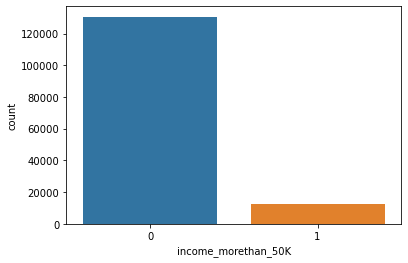

In [8]:
sns.countplot(x = 'income_morethan_50K' , data = train);

AAGE
Skew : 0.53


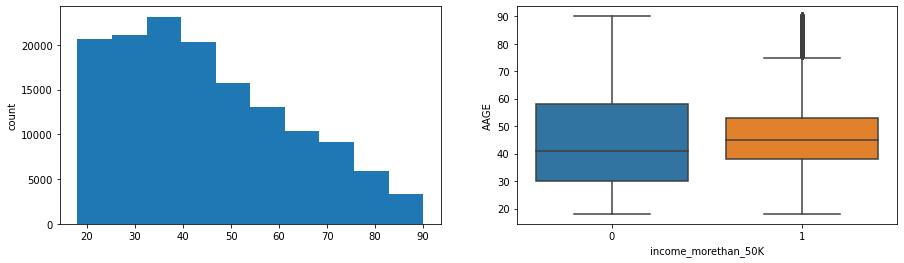

ADTIND
Skew : -0.01


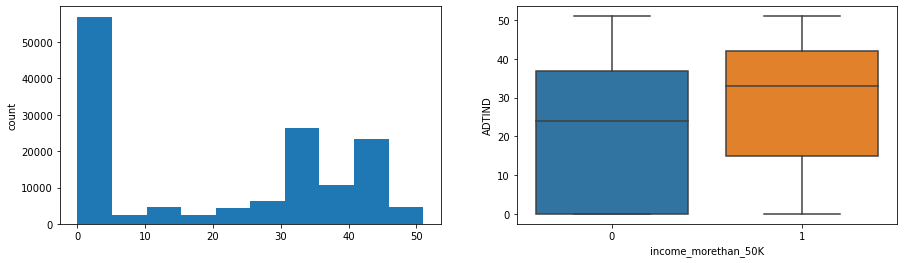

ADTOCC
Skew : 0.37


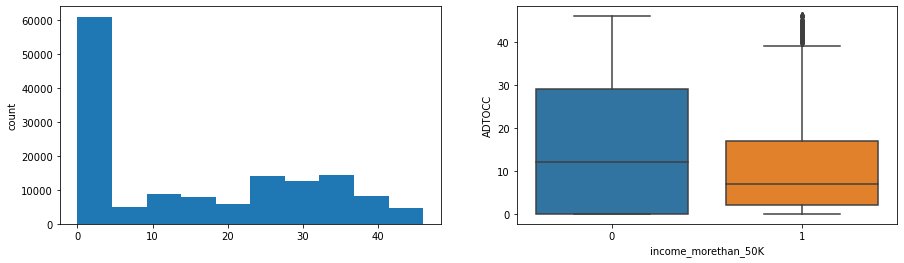

AHRSPAY
Skew : 7.33


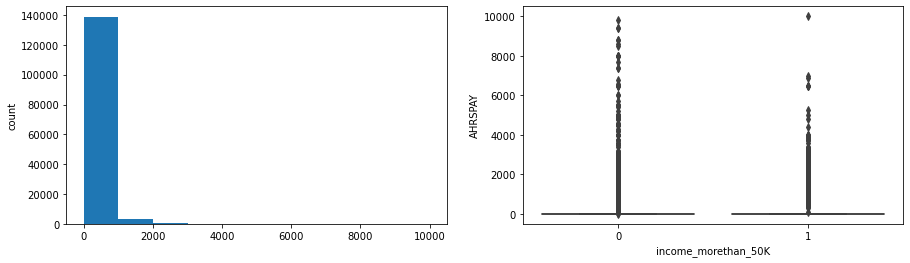

CAPGAIN
Skew : 16.16


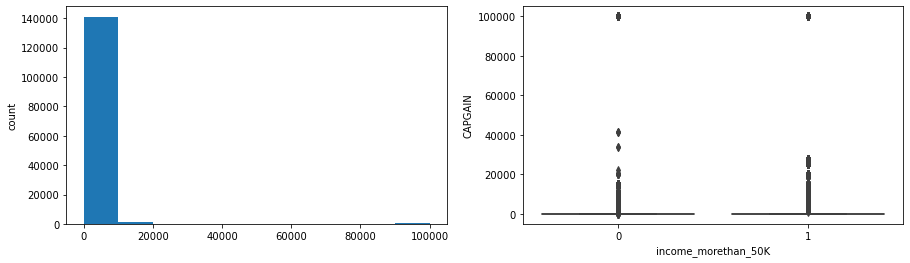

CAPLOSS
Skew : 6.6


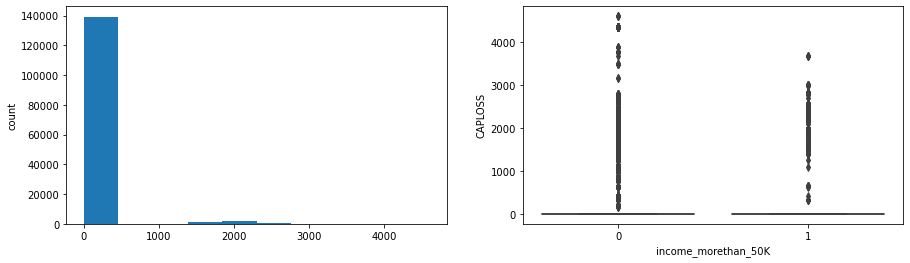

DIVVAL
Skew : 22.89


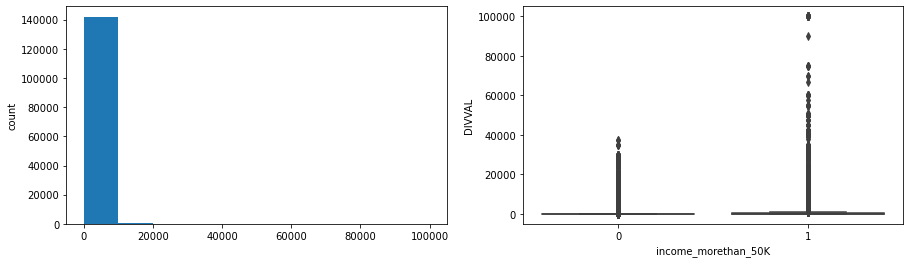

HHDREL
Skew : 1.47


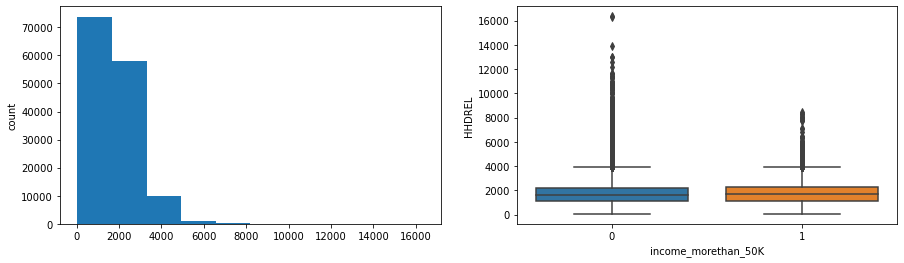

NOEMP
Skew : 0.28


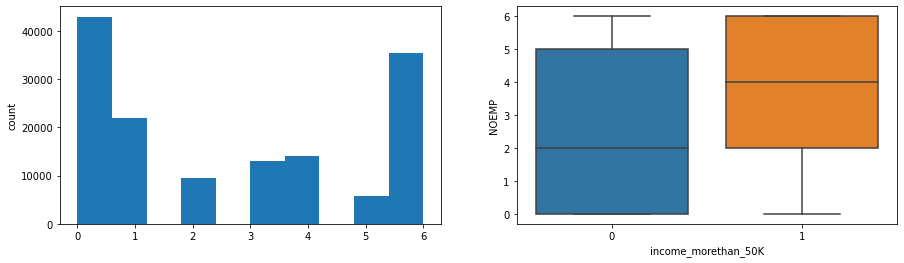

SEOTR
Skew : 2.35


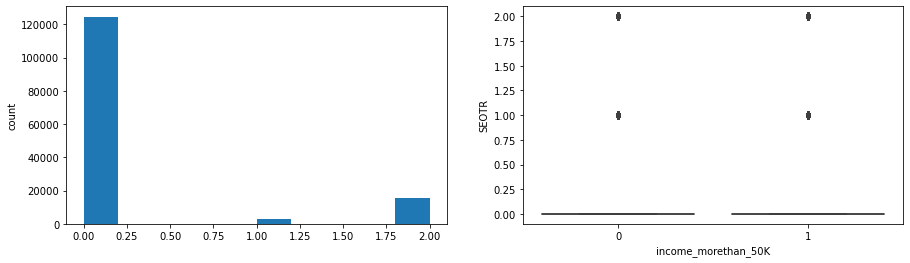

VETYN
Skew : -8.38


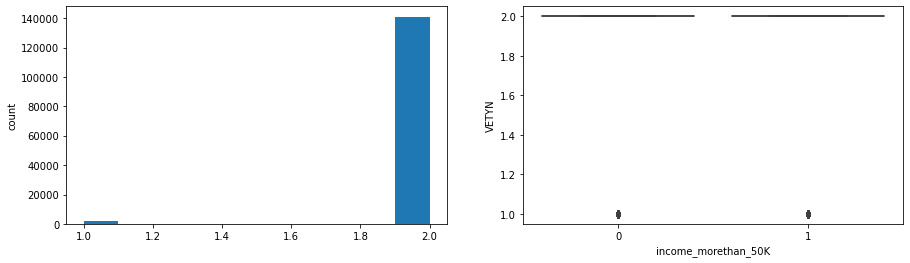

WKSWORK
Skew : -0.46


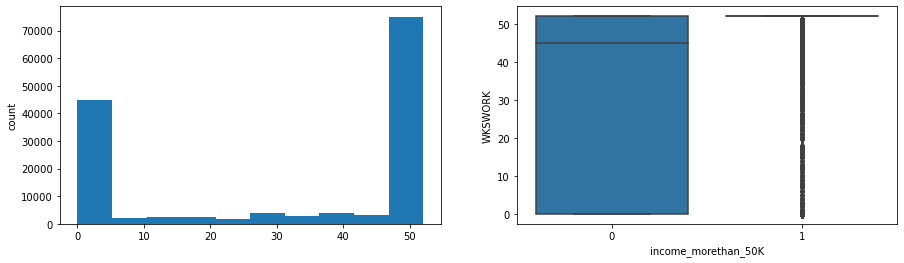

year
Skew : -0.01


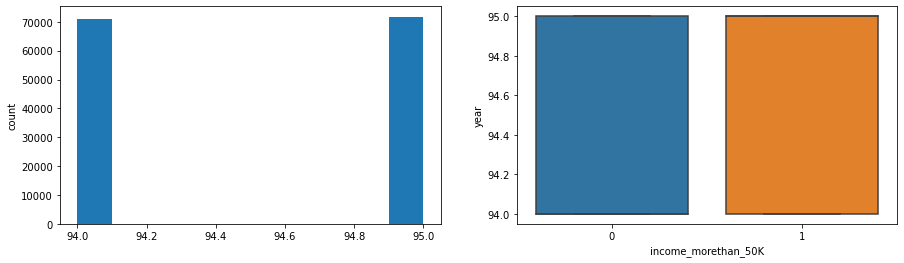

income_morethan_50K
Skew : 2.96


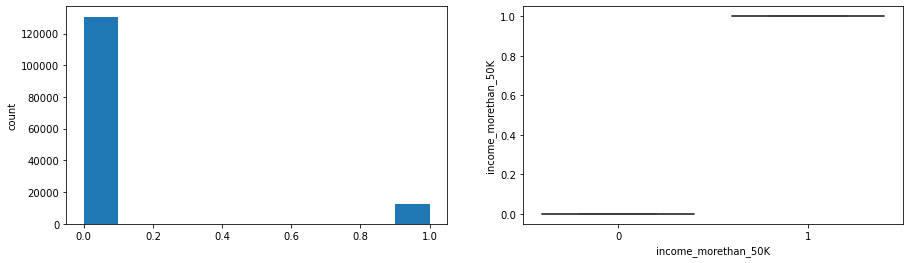

Id
Skew : 0.0


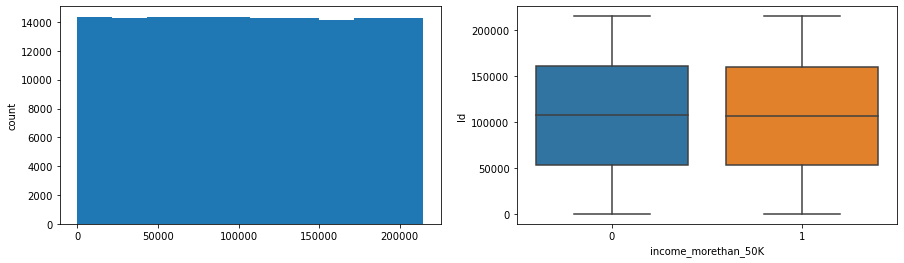

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = train.select_dtypes(include=numerics)

for col in newdf.columns:
    print(col)
    print('Skew :',round(train[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    train[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(y=col , x = 'income_morethan_50K' , data = train)
    plt.show()

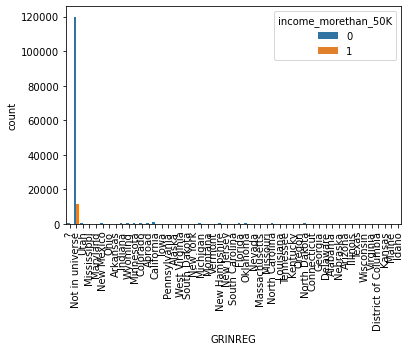

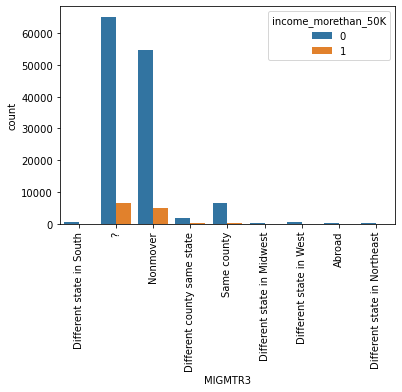

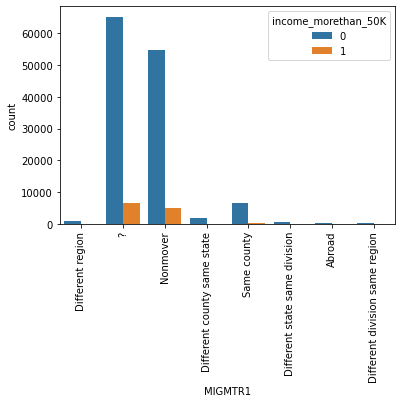

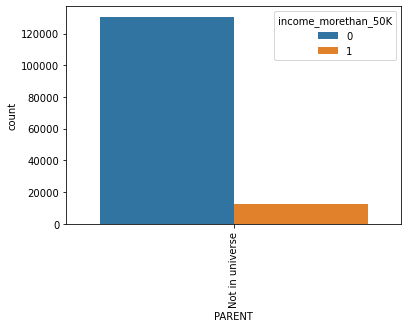

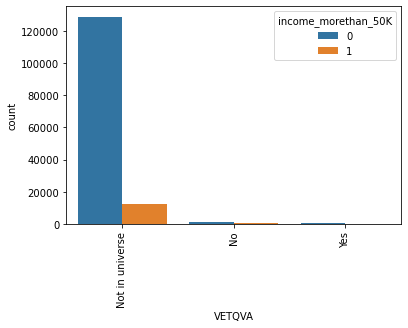

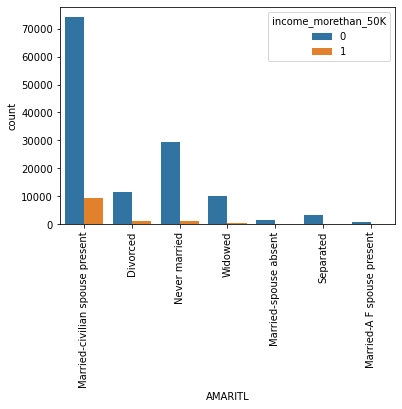

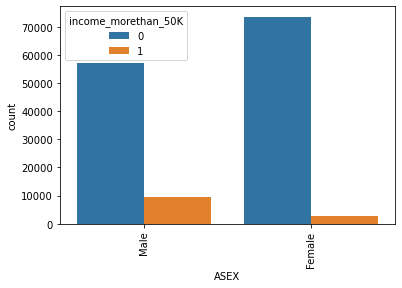

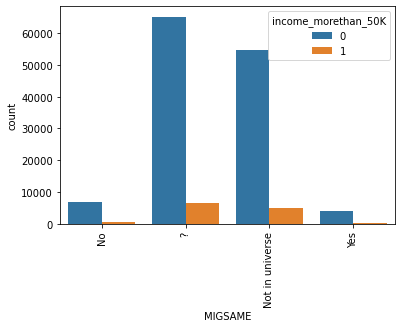

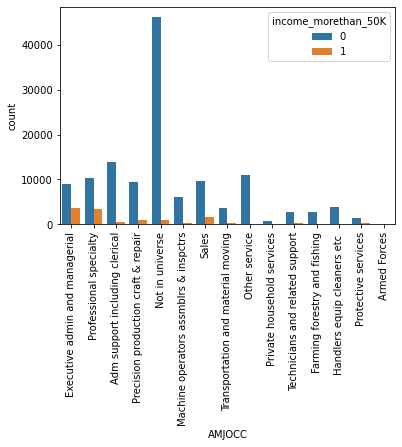

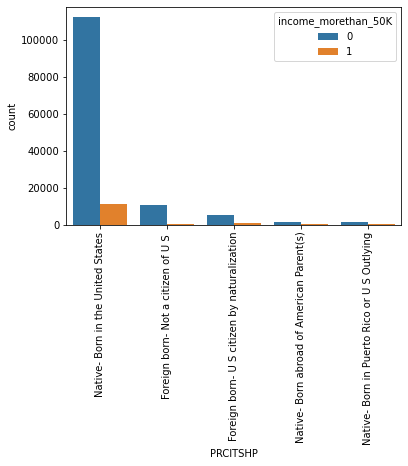

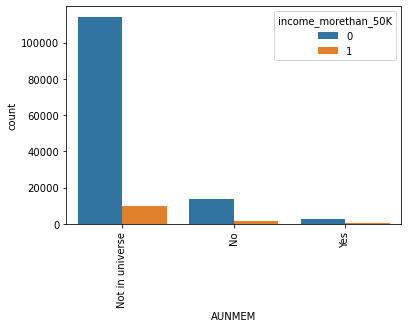

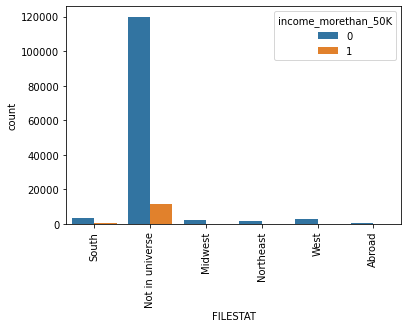

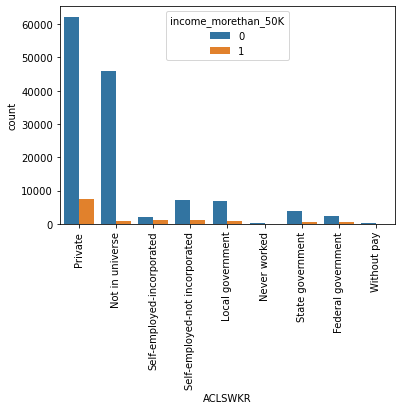

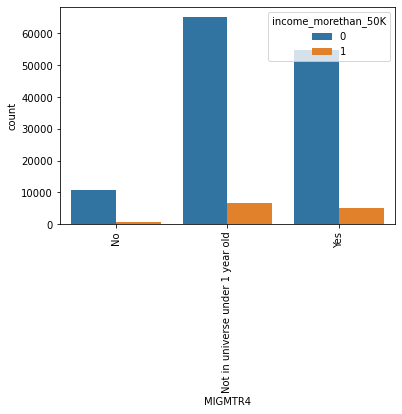

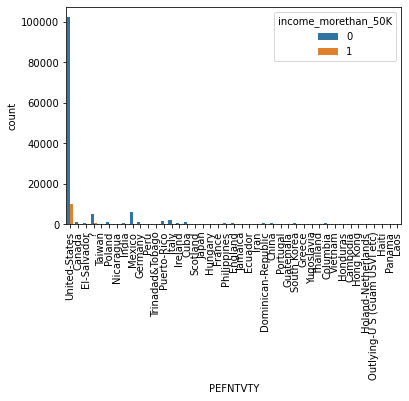

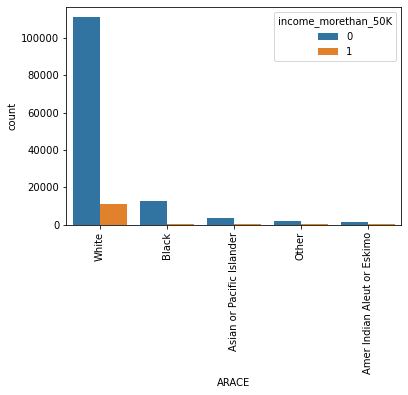

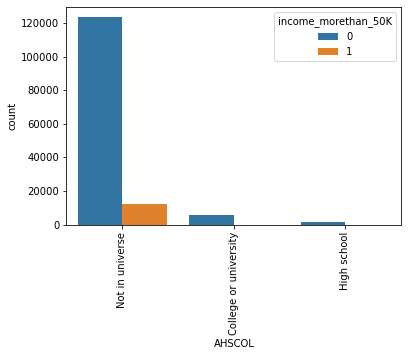

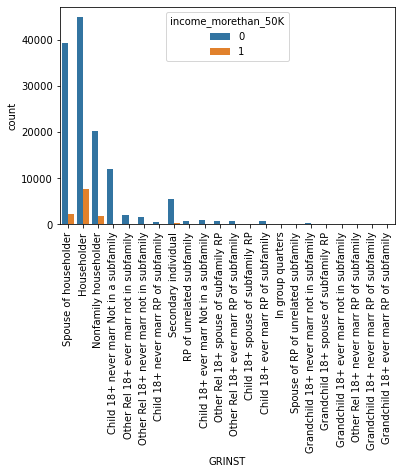

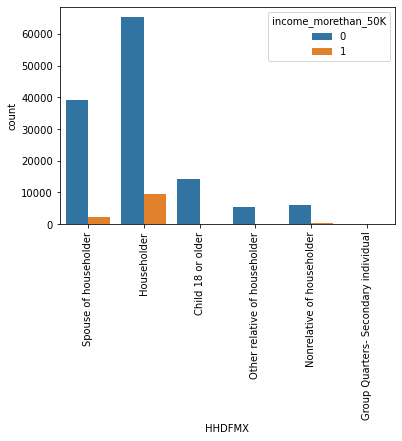

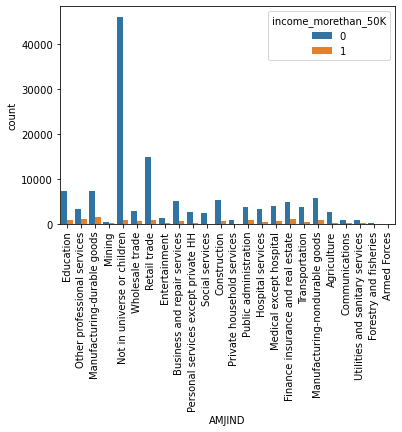

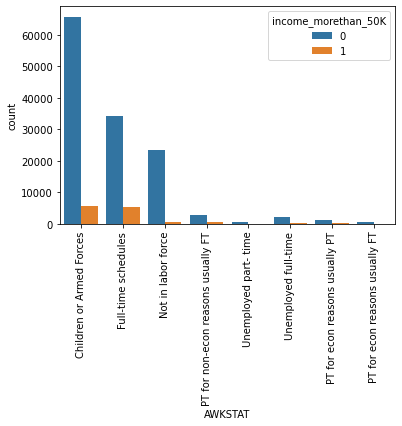

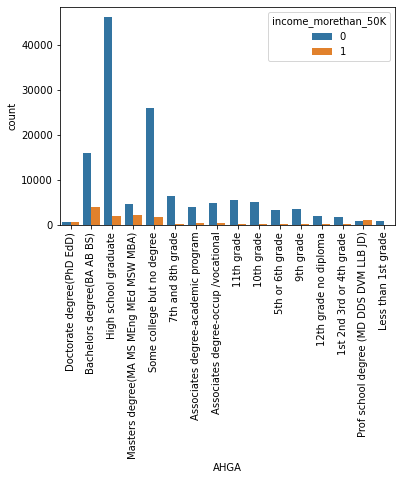

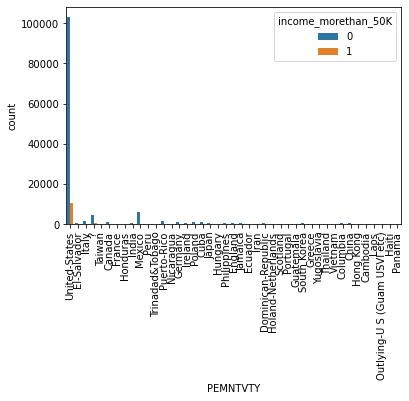

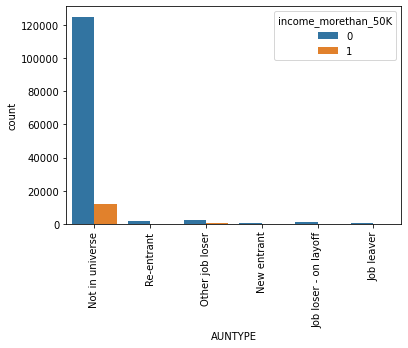

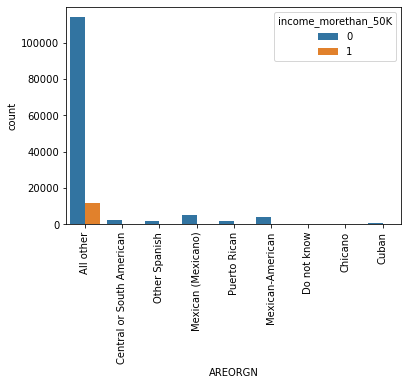

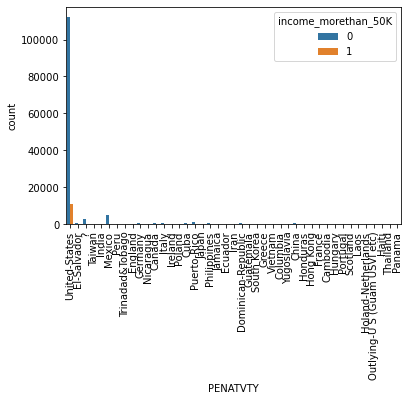

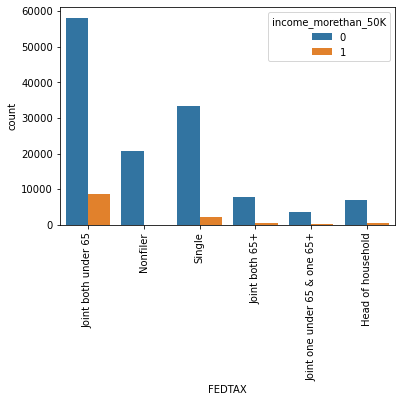

In [10]:
cat_cols = list(set(train.columns) - set(newdf.columns))


for col in cat_cols:
    plt.xticks(rotation = 90)
    sns.countplot(x = col , hue = 'income_morethan_50K' , data = train)
    plt.show()

In [11]:
target = 'income_morethan_50K'
X = train.drop([target , 'Id'], axis = 1)
y = train[target].values

In [12]:
#Splitting the data into train and test sets
X_train,X_cv,y_train,y_cv=train_test_split(X, y, test_size=0.20, random_state=1 , stratify=y)

In [13]:
X_train.shape , y_train.shape

((114290, 40), (114290,))

In [14]:
X_cv.shape , y_cv.shape

((28573, 40), (28573,))

## Preprocessing

In [15]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [17]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [18]:
X_train

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,year
34040,33,State government,2,43,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Agriculture,Farming forestry and fishing,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
89921,71,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,?,?,United-States,Native- Born in the United States,0,Not in universe,2,0,94
60509,63,Not in universe,0,0,High school graduate,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
91606,39,Local government,43,10,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Never married,Education,Professional specialty,...,Not in universe,Mexico,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
119995,41,Never worked,0,0,High school graduate,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37092,30,Private,36,27,Bachelors degree(BA AB BS),0,Not in universe,Married-spouse absent,Private household services,Private household services,...,Not in universe,?,?,?,Foreign born- Not a citizen of U S,0,Not in universe,2,52,94
106523,84,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
19890,25,Local government,43,10,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Education,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,42,95
60201,46,Not in universe,0,0,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94


In [19]:
X_train = preprocessor.fit_transform(X_train).toarray()
X_cv = preprocessor.transform(X_cv).toarray()

In [20]:
test_id = test['Id']
test_X = test.drop('Id',axis = 1)
X_test = preprocessor.transform(test_X).toarray()

In [21]:
X_train.shape , y_train.shape

((114290, 373), (114290,))

In [22]:
X_cv.shape , y_cv.shape

((28573, 373), (28573,))

In [23]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [25]:
#define logistic regression model 
log_reg= LogisticRegression()#write your code here

#fit the model
log_reg.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.95      0.99      0.96    104472
           1       0.72      0.39      0.51      9818

    accuracy                           0.93    114290
   macro avg       0.83      0.69      0.74    114290
weighted avg       0.93      0.93      0.93    114290



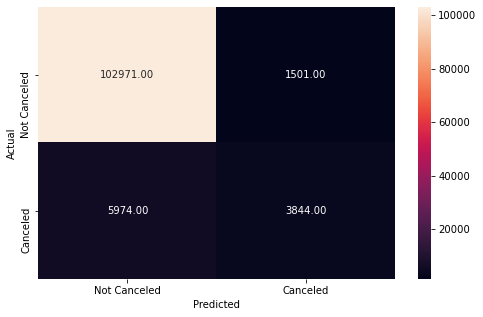

In [26]:
# Checking performance on the training data
y_pred_train = log_reg.predict(X_train)
metrics_score(y_train,y_pred_train)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     26119
           1       0.75      0.40      0.52      2454

    accuracy                           0.94     28573
   macro avg       0.85      0.69      0.74     28573
weighted avg       0.93      0.94      0.93     28573



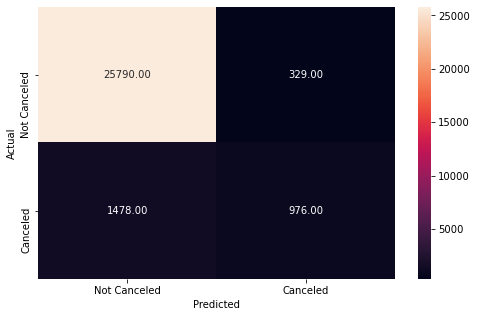

In [27]:
# Checking performance on the cross validation data data
y_pred_cv = log_reg.predict(X_cv)
metrics_score(y_cv,y_pred_cv)

In [27]:
### Cross validation and hyperparameter tuning
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1','l2'], 'C': [0.0001,0.01,0.1,1,10,100]}
clf = GridSearchCV(LogisticRegression(), param_grid=grid_values , scoring = 'f1_weighted' , verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.0001, penalty=l1 ............................................
[CV] ............................. C=0.0001, penalty=l1, total=   0.1s
[CV] C=0.0001, penalty=l1 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. C=0.0001, penalty=l1, total=   0.1s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ............................. C=0.0001, penalty=l1, total=   0.1s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ............................. C=0.0001, penalty=l1, total=   0.1s
[CV] C=0.0001, penalty=l1 ............................................
[CV] ............................. C=0.0001, penalty=l1, total=   0.1s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ............................. C=0.0001, penalty=l2, total=   0.9s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ............................. C=0.0001, penalty=l2, total=   1.0s
[CV] C=0.0001, penalty=l2 ............................................
[CV] ............................. C=0.0001, penalty=l2, total=   1.1s
[CV] C=0.0001, penalty=l2 ............................................
[CV] .

[CV] ................................ C=100, penalty=l2, total=   4.7s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.9min finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1_weighted', verbose=2)

              precision    recall  f1-score   support

           0       0.95      0.99      0.96    104472
           1       0.72      0.39      0.51      9818

    accuracy                           0.93    114290
   macro avg       0.83      0.69      0.74    114290
weighted avg       0.93      0.93      0.93    114290



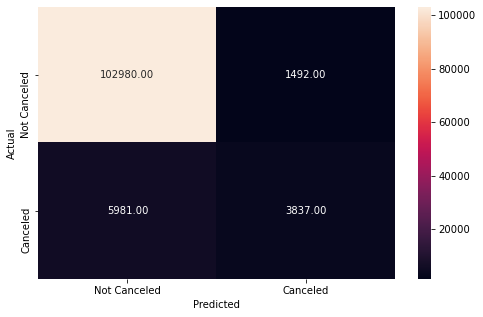

In [28]:
# Checking performance on the training data
y_pred_train = clf.predict(X_train)
metrics_score(y_train,y_pred_train)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     26119
           1       0.74      0.40      0.52      2454

    accuracy                           0.94     28573
   macro avg       0.85      0.69      0.74     28573
weighted avg       0.93      0.94      0.93     28573



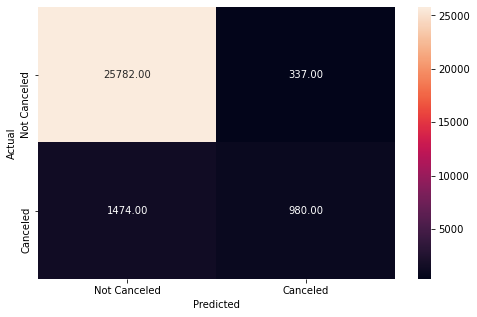

In [29]:
# Checking performance on the cross validation data data
y_pred_cv = clf.predict(X_cv)
metrics_score(y_cv,y_pred_cv)

In [30]:
clf.best_estimator_

LogisticRegression(C=10)

In [31]:
tuned_lr = LogisticRegression(C=10)
tuned_lr.fit(X_train , y_train)

LogisticRegression(C=10)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     26119
           1       0.74      0.40      0.52      2454

    accuracy                           0.94     28573
   macro avg       0.85      0.69      0.74     28573
weighted avg       0.93      0.94      0.93     28573



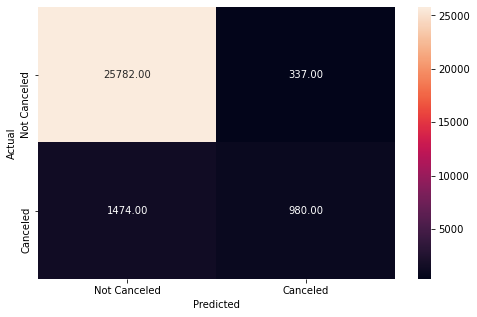

In [32]:
# Checking performance on the cross validation data data
y_pred_cv = tuned_lr.predict(X_cv)
metrics_score(y_cv,y_pred_cv)

In [33]:
# test_id = test['Id']
# test_X = test.drop('Id',axis = 1)
# X_test = preprocessor.transform(test_X).toarray()

In [34]:
y_test_pred = tuned_lr.predict(X_test)
data = {'Id' : test_id,
       'income_morethan_50K' : y_test_pred}

pd.DataFrame(data).to_csv('submission.csv', index = False)

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     26119
           1       0.63      0.38      0.47      2454

    accuracy                           0.93     28573
   macro avg       0.79      0.68      0.72     28573
weighted avg       0.92      0.93      0.92     28573



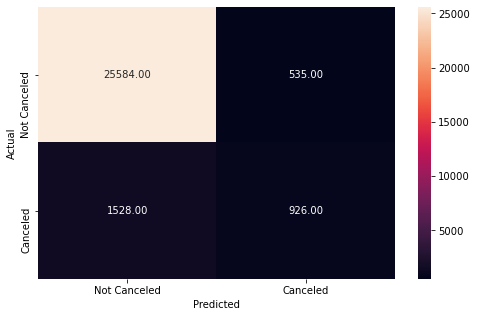

In [36]:
# Checking performance on the cross validation data data
y_pred_cv = knn.predict(X_cv)
metrics_score(y_cv,y_pred_cv)

In [37]:
from sklearn.ensemble import RandomForestClassifier

tuned_rf = RandomForestClassifier()
tuned_rf.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     26119
           1       0.77      0.38      0.51      2454

    accuracy                           0.94     28573
   macro avg       0.86      0.68      0.74     28573
weighted avg       0.93      0.94      0.93     28573



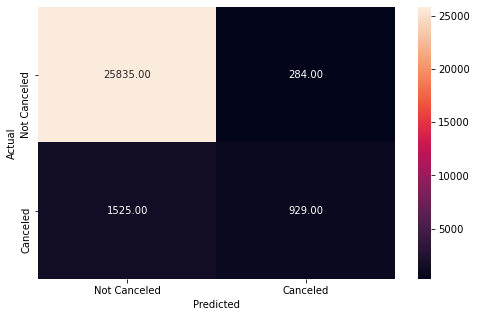

In [38]:
# Checking performance on the cross validation data data
y_pred_cv = tuned_rf.predict(X_cv)
metrics_score(y_cv,y_pred_cv)

In [43]:
xgb = XGBClassifier(tree_method='gpu_hist')
xgb.fit(X_train, y_train)

[17:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [32]:
#!pip install xgboost
from xgboost import XGBClassifier

# Checking performance on the cross validation data data
grid_values = {'gamma': [0, 0.1, 0.2 , 0.3, 0.4], 'n_estimators': range(60, 200, 40)
               ,'learning_rate':[0.15,0.2,0.25,0.3,0.35]} #'max_depth': np.arange(3,8)}
xgb_best = GridSearchCV(XGBClassifier(tree_method='gpu_hist'), param_grid=grid_values , scoring = 'f1_weighted' ,verbose=2,cv=5)

xgb_best.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] gamma=0, learning_rate=0.15, n_estimators=60 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[15:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.15, n_estimators=60, total=   4.4s
[CV] gamma=0, learning_rate=0.15, n_estimators=60 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[15:24:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.15, n_estimators=60, total=   2.8s
[CV] gamma=0, learning_rate=0.15, n_estimators=60 ....................
[15:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.15, n_estimators=60, total=   2.7s
[CV] gamma=0, learning_rate=0.15, n_estimators=60 ....................
[15:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .... gamma=0, learning_rate=0.15, n_estimators=100, total=   3.8s
[CV] gamma=0, learning_rate=0.15, n_estimators=140 ...................
[15:26:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.15, n_estimators=140, total=   4.6s
[CV] gamma=0, learning_rate=0.15, n_estimators=140 ...................
[15:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.15, n_estimators=140, total=   4.7s
[CV] gamma=0, learning_ra

[15:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.15, n_estimators=180, total=   5.7s
[CV] gamma=0, learning_rate=0.15, n_estimators=180 ...................
[15:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.15, n_estimators=180, total=   5.5s
[CV] gamma=0, learning_rate=0.2, n_estimators=60 .....................
[15:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ..... gamma=0, learning_rate=0.2, n_estimators=100, total=   3.9s
[CV] gamma=0, learning_rate=0.2, n_estimators=100 ....................
[15:28:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.2, n_estimators=100, total=   3.7s
[CV] gamma=0, learning_rate=0.2, n_estimators=100 ....................
[15:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.2, n_estimators=100, total=   3.8s
[CV] gamma=0, learning_ra

[15:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.2, n_estimators=180, total=   5.8s
[CV] gamma=0, learning_rate=0.2, n_estimators=180 ....................
[15:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.2, n_estimators=180, total=   5.9s
[CV] gamma=0, learning_rate=0.2, n_estimators=180 ....................
[15:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .... gamma=0, learning_rate=0.25, n_estimators=100, total=   3.8s
[CV] gamma=0, learning_rate=0.25, n_estimators=100 ...................
[15:31:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.25, n_estimators=100, total=   3.8s
[CV] gamma=0, learning_rate=0.25, n_estimators=100 ...................
[15:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.25, n_estimators=100, total=   3.8s
[CV] gamma=0, learning_ra

[15:32:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.25, n_estimators=180, total=   5.9s
[CV] gamma=0, learning_rate=0.25, n_estimators=180 ...................
[15:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.25, n_estimators=180, total=   5.8s
[CV] gamma=0, learning_rate=0.25, n_estimators=180 ...................
[15:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ..... gamma=0, learning_rate=0.3, n_estimators=100, total=   3.8s
[CV] gamma=0, learning_rate=0.3, n_estimators=100 ....................
[15:34:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.3, n_estimators=100, total=   3.7s
[CV] gamma=0, learning_rate=0.3, n_estimators=100 ....................
[15:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.3, n_estimators=100, total=   3.6s
[CV] gamma=0, learning_ra

[15:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.3, n_estimators=140, total=   4.9s
[CV] gamma=0, learning_rate=0.3, n_estimators=180 ....................
[15:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.3, n_estimators=180, total=   5.9s
[CV] gamma=0, learning_rate=0.3, n_estimators=180 ....................
[15:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ..... gamma=0, learning_rate=0.35, n_estimators=60, total=   2.6s
[CV] gamma=0, learning_rate=0.35, n_estimators=60 ....................
[15:36:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.35, n_estimators=60, total=   2.7s
[CV] gamma=0, learning_rate=0.35, n_estimators=60 ....................
[15:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ..... gamma=0, learning_rate=0.35, n_estimators=60, total=   2.7s
[CV] gamma=0, learning_ra

[15:38:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.35, n_estimators=140, total=   5.7s
[CV] gamma=0, learning_rate=0.35, n_estimators=140 ...................
[15:38:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0, learning_rate=0.35, n_estimators=140, total=   5.6s
[CV] gamma=0, learning_rate=0.35, n_estimators=140 ...................
[15:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ... gamma=0.1, learning_rate=0.15, n_estimators=60, total=   3.5s
[CV] gamma=0.1, learning_rate=0.15, n_estimators=60 ..................
[15:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.1, learning_rate=0.15, n_estimators=60, total=   3.6s
[CV] gamma=0.1, learning_rate=0.15, n_estimators=60 ..................
[15:40:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.1, learning_rate=0.15, n_estimators=60, total=   3.7s
[CV] gamma=0.1, learning_

[15:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.1, learning_rate=0.15, n_estimators=140, total=   5.7s
[CV] gamma=0.1, learning_rate=0.15, n_estimators=140 .................
[15:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.1, learning_rate=0.15, n_estimators=140, total=   5.6s
[CV] gamma=0.1, learning_rate=0.15, n_estimators=140 .................
[15:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .... gamma=0.1, learning_rate=0.2, n_estimators=60, total=   3.2s
[CV] gamma=0.1, learning_rate=0.2, n_estimators=60 ...................
[15:43:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.1, learning_rate=0.2, n_estimators=60, total=   3.2s
[CV] gamma=0.1, learning_rate=0.2, n_estimators=60 ...................
[15:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.1, learning_rate=0.2, n_estimators=60, total=   3.3s
[CV] gamma=0.1, learning_

[15:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.1, learning_rate=0.2, n_estimators=140, total=   5.3s
[CV] gamma=0.1, learning_rate=0.2, n_estimators=140 ..................
[15:44:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.1, learning_rate=0.2, n_estimators=140, total=   5.7s
[CV] gamma=0.1, learning_rate=0.2, n_estimators=140 ..................
[15:44:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ... gamma=0.1, learning_rate=0.2, n_estimators=180, total=   6.8s
[CV] gamma=0.1, learning_rate=0.2, n_estimators=180 ..................
[15:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.1, learning_rate=0.2, n_estimators=180, total=   6.7s
[CV] gamma=0.1, learning_rate=0.25, n_estimators=60 ..................
[15:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.1, learning_rate=0.25, n_estimators=60, total=   3.2s
[CV] gamma=0.1, learning_

[15:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.1, learning_rate=0.25, n_estimators=100, total=   5.1s
[CV] gamma=0.1, learning_rate=0.25, n_estimators=100 .................
[15:48:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.1, learning_rate=0.25, n_estimators=100, total=   5.3s
[CV] gamma=0.1, learning_rate=0.25, n_estimators=100 .................
[15:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .. gamma=0.1, learning_rate=0.25, n_estimators=180, total=   7.8s
[CV] gamma=0.1, learning_rate=0.25, n_estimators=180 .................
[15:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.1, learning_rate=0.25, n_estimators=180, total=   7.7s
[CV] gamma=0.1, learning_rate=0.25, n_estimators=180 .................
[15:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.1, learning_rate=0.25, n_estimators=180, total=   7.6s
[CV] gamma=0.1, learning_

[15:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.1, learning_rate=0.3, n_estimators=100, total=   5.1s
[CV] gamma=0.1, learning_rate=0.3, n_estimators=100 ..................
[15:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.1, learning_rate=0.3, n_estimators=100, total=   5.2s
[CV] gamma=0.1, learning_rate=0.3, n_estimators=100 ..................
[15:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ... gamma=0.1, learning_rate=0.3, n_estimators=180, total=   6.8s
[CV] gamma=0.1, learning_rate=0.3, n_estimators=180 ..................
[15:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.1, learning_rate=0.3, n_estimators=180, total=   7.0s
[CV] gamma=0.1, learning_rate=0.3, n_estimators=180 ..................
[15:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.1, learning_rate=0.3, n_estimators=180, total=   7.0s
[CV] gamma=0.1, learning_

[15:55:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.1, learning_rate=0.35, n_estimators=100, total=   4.2s
[CV] gamma=0.1, learning_rate=0.35, n_estimators=100 .................
[15:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.1, learning_rate=0.35, n_estimators=100, total=   4.2s
[CV] gamma=0.1, learning_rate=0.35, n_estimators=100 .................
[15:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .. gamma=0.1, learning_rate=0.35, n_estimators=140, total=   8.0s
[CV] gamma=0.1, learning_rate=0.35, n_estimators=180 .................
[15:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.1, learning_rate=0.35, n_estimators=180, total=   9.7s
[CV] gamma=0.1, learning_rate=0.35, n_estimators=180 .................
[15:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.1, learning_rate=0.35, n_estimators=180, total=   9.7s
[CV] gamma=0.1, learning_

[15:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.2, learning_rate=0.15, n_estimators=60, total=   5.3s
[CV] gamma=0.2, learning_rate=0.15, n_estimators=60 ..................
[15:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.2, learning_rate=0.15, n_estimators=60, total=   5.2s
[CV] gamma=0.2, learning_rate=0.15, n_estimators=100 .................
[15:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .. gamma=0.2, learning_rate=0.15, n_estimators=140, total=   8.4s
[CV] gamma=0.2, learning_rate=0.15, n_estimators=140 .................
[16:01:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.2, learning_rate=0.15, n_estimators=140, total=   8.4s
[CV] gamma=0.2, learning_rate=0.15, n_estimators=140 .................
[16:02:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.2, learning_rate=0.15, n_estimators=140, total=   8.5s
[CV] gamma=0.2, learning_

[16:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.2, learning_rate=0.2, n_estimators=60, total=   5.0s
[CV] gamma=0.2, learning_rate=0.2, n_estimators=60 ...................
[16:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.2, learning_rate=0.2, n_estimators=60, total=   4.8s
[CV] gamma=0.2, learning_rate=0.2, n_estimators=60 ...................
[16:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ... gamma=0.2, learning_rate=0.2, n_estimators=140, total=   8.5s
[CV] gamma=0.2, learning_rate=0.2, n_estimators=140 ..................
[16:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.2, learning_rate=0.2, n_estimators=140, total=   8.0s
[CV] gamma=0.2, learning_rate=0.2, n_estimators=140 ..................
[16:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.2, learning_rate=0.2, n_estimators=140, total=   8.2s
[CV] gamma=0.2, learning_

[16:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.2, learning_rate=0.25, n_estimators=60, total=   4.8s
[CV] gamma=0.2, learning_rate=0.25, n_estimators=60 ..................
[16:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.2, learning_rate=0.25, n_estimators=60, total=   5.2s
[CV] gamma=0.2, learning_rate=0.25, n_estimators=60 ..................
[16:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .. gamma=0.2, learning_rate=0.25, n_estimators=140, total=   7.9s
[CV] gamma=0.2, learning_rate=0.25, n_estimators=140 .................
[16:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.2, learning_rate=0.25, n_estimators=140, total=   8.3s
[CV] gamma=0.2, learning_rate=0.25, n_estimators=140 .................
[16:11:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.2, learning_rate=0.25, n_estimators=140, total=   8.2s
[CV] gamma=0.2, learning_

[16:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.2, learning_rate=0.25, n_estimators=180, total=   6.7s
[CV] gamma=0.2, learning_rate=0.3, n_estimators=60 ...................
[16:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.2, learning_rate=0.3, n_estimators=60, total=   3.9s
[CV] gamma=0.2, learning_rate=0.3, n_estimators=60 ...................
[16:13:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ... gamma=0.2, learning_rate=0.3, n_estimators=100, total=   5.1s
[CV] gamma=0.2, learning_rate=0.3, n_estimators=100 ..................
[16:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.2, learning_rate=0.3, n_estimators=100, total=   5.0s
[CV] gamma=0.2, learning_rate=0.3, n_estimators=100 ..................
[16:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.2, learning_rate=0.3, n_estimators=100, total=   5.3s
[CV] gamma=0.2, learning_

[16:16:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.2, learning_rate=0.3, n_estimators=180, total=   8.2s
[CV] gamma=0.2, learning_rate=0.3, n_estimators=180 ..................
[16:17:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.2, learning_rate=0.3, n_estimators=180, total=   8.0s
[CV] gamma=0.2, learning_rate=0.3, n_estimators=180 ..................
[16:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .. gamma=0.2, learning_rate=0.35, n_estimators=100, total=   5.0s
[CV] gamma=0.2, learning_rate=0.35, n_estimators=100 .................
[16:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.2, learning_rate=0.35, n_estimators=100, total=   5.0s
[CV] gamma=0.2, learning_rate=0.35, n_estimators=100 .................
[16:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.2, learning_rate=0.35, n_estimators=100, total=   4.8s
[CV] gamma=0.2, learning_

[16:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.2, learning_rate=0.35, n_estimators=180, total=   7.6s
[CV] gamma=0.2, learning_rate=0.35, n_estimators=180 .................
[16:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.2, learning_rate=0.35, n_estimators=180, total=   7.5s
[CV] gamma=0.2, learning_rate=0.35, n_estimators=180 .................
[16:20:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .. gamma=0.3, learning_rate=0.15, n_estimators=100, total=   4.5s
[CV] gamma=0.3, learning_rate=0.15, n_estimators=100 .................
[16:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.3, learning_rate=0.15, n_estimators=100, total=   4.6s
[CV] gamma=0.3, learning_rate=0.15, n_estimators=100 .................
[16:22:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.3, learning_rate=0.15, n_estimators=100, total=   4.6s
[CV] gamma=0.3, learning_

[16:23:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.3, learning_rate=0.15, n_estimators=180, total=   6.6s
[CV] gamma=0.3, learning_rate=0.15, n_estimators=180 .................
[16:23:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.3, learning_rate=0.15, n_estimators=180, total=   6.6s
[CV] gamma=0.3, learning_rate=0.15, n_estimators=180 .................
[16:23:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .... gamma=0.3, learning_rate=0.2, n_estimators=60, total=   3.2s
[CV] gamma=0.3, learning_rate=0.2, n_estimators=60 ...................
[16:25:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.3, learning_rate=0.2, n_estimators=60, total=   3.1s
[CV] gamma=0.3, learning_rate=0.2, n_estimators=100 ..................
[16:25:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.3, learning_rate=0.2, n_estimators=100, total=   4.1s
[CV] gamma=0.3, learning_

[16:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.3, learning_rate=0.2, n_estimators=140, total=   5.0s
[CV] gamma=0.3, learning_rate=0.2, n_estimators=140 ..................
[16:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.3, learning_rate=0.2, n_estimators=140, total=   5.1s
[CV] gamma=0.3, learning_rate=0.2, n_estimators=140 ..................
[16:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ... gamma=0.3, learning_rate=0.25, n_estimators=60, total=   3.2s
[CV] gamma=0.3, learning_rate=0.25, n_estimators=60 ..................
[16:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.3, learning_rate=0.25, n_estimators=60, total=   3.1s
[CV] gamma=0.3, learning_rate=0.25, n_estimators=60 ..................
[16:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.3, learning_rate=0.25, n_estimators=60, total=   3.1s
[CV] gamma=0.3, learning_

[16:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.3, learning_rate=0.25, n_estimators=140, total=   5.0s
[CV] gamma=0.3, learning_rate=0.25, n_estimators=140 .................
[16:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.3, learning_rate=0.25, n_estimators=140, total=   5.0s
[CV] gamma=0.3, learning_rate=0.25, n_estimators=140 .................
[16:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .... gamma=0.3, learning_rate=0.3, n_estimators=60, total=   2.9s
[CV] gamma=0.3, learning_rate=0.3, n_estimators=60 ...................
[16:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.3, learning_rate=0.3, n_estimators=60, total=   3.1s
[CV] gamma=0.3, learning_rate=0.3, n_estimators=60 ...................
[16:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.3, learning_rate=0.3, n_estimators=60, total=   2.9s
[CV] gamma=0.3, learning_

[16:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.3, learning_rate=0.3, n_estimators=140, total=   5.2s
[CV] gamma=0.3, learning_rate=0.3, n_estimators=140 ..................
[16:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.3, learning_rate=0.3, n_estimators=140, total=   4.9s
[CV] gamma=0.3, learning_rate=0.3, n_estimators=140 ..................
[16:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ... gamma=0.3, learning_rate=0.3, n_estimators=180, total=   6.0s
[CV] gamma=0.3, learning_rate=0.35, n_estimators=60 ..................
[16:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.3, learning_rate=0.35, n_estimators=60, total=   2.8s
[CV] gamma=0.3, learning_rate=0.35, n_estimators=60 ..................
[16:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.3, learning_rate=0.35, n_estimators=60, total=   2.8s
[CV] gamma=0.3, learning_

[16:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.3, learning_rate=0.35, n_estimators=100, total=   4.2s
[CV] gamma=0.3, learning_rate=0.35, n_estimators=100 .................
[16:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.3, learning_rate=0.35, n_estimators=100, total=   4.0s
[CV] gamma=0.3, learning_rate=0.35, n_estimators=140 .................
[16:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .. gamma=0.3, learning_rate=0.35, n_estimators=180, total=   5.7s
[CV] gamma=0.3, learning_rate=0.35, n_estimators=180 .................
[16:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.3, learning_rate=0.35, n_estimators=180, total=   5.4s
[CV] gamma=0.3, learning_rate=0.35, n_estimators=180 .................
[16:36:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.3, learning_rate=0.35, n_estimators=180, total=   5.2s
[CV] gamma=0.3, learning_

[16:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.4, learning_rate=0.15, n_estimators=100, total=   4.1s
[CV] gamma=0.4, learning_rate=0.15, n_estimators=100 .................
[16:37:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.4, learning_rate=0.15, n_estimators=100, total=   4.2s
[CV] gamma=0.4, learning_rate=0.15, n_estimators=100 .................
[16:37:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .. gamma=0.4, learning_rate=0.15, n_estimators=180, total=   6.1s
[CV] gamma=0.4, learning_rate=0.15, n_estimators=180 .................
[16:39:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.4, learning_rate=0.15, n_estimators=180, total=   6.1s
[CV] gamma=0.4, learning_rate=0.15, n_estimators=180 .................
[16:39:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.4, learning_rate=0.15, n_estimators=180, total=   6.1s
[CV] gamma=0.4, learning_

[16:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.4, learning_rate=0.2, n_estimators=100, total=   4.1s
[CV] gamma=0.4, learning_rate=0.2, n_estimators=100 ..................
[16:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.4, learning_rate=0.2, n_estimators=100, total=   4.2s
[CV] gamma=0.4, learning_rate=0.2, n_estimators=100 ..................
[16:40:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ... gamma=0.4, learning_rate=0.2, n_estimators=180, total=   6.1s
[CV] gamma=0.4, learning_rate=0.2, n_estimators=180 ..................
[16:42:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.4, learning_rate=0.2, n_estimators=180, total=   6.0s
[CV] gamma=0.4, learning_rate=0.2, n_estimators=180 ..................
[16:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.4, learning_rate=0.2, n_estimators=180, total=   5.9s
[CV] gamma=0.4, learning_

[16:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.4, learning_rate=0.25, n_estimators=60, total=   3.0s
[CV] gamma=0.4, learning_rate=0.25, n_estimators=100 .................
[16:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.4, learning_rate=0.25, n_estimators=100, total=   4.2s
[CV] gamma=0.4, learning_rate=0.25, n_estimators=100 .................
[16:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .. gamma=0.4, learning_rate=0.25, n_estimators=140, total=   5.3s
[CV] gamma=0.4, learning_rate=0.25, n_estimators=140 .................
[16:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.4, learning_rate=0.25, n_estimators=140, total=   5.3s
[CV] gamma=0.4, learning_rate=0.25, n_estimators=140 .................
[16:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.4, learning_rate=0.25, n_estimators=140, total=   5.3s
[CV] gamma=0.4, learning_

[16:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.4, learning_rate=0.3, n_estimators=60, total=   3.0s
[CV] gamma=0.4, learning_rate=0.3, n_estimators=60 ...................
[16:46:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .... gamma=0.4, learning_rate=0.3, n_estimators=60, total=   3.0s
[CV] gamma=0.4, learning_rate=0.3, n_estimators=60 ...................
[16:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] ... gamma=0.4, learning_rate=0.3, n_estimators=140, total=   5.1s
[CV] gamma=0.4, learning_rate=0.3, n_estimators=140 ..................
[16:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.4, learning_rate=0.3, n_estimators=140, total=   5.2s
[CV] gamma=0.4, learning_rate=0.3, n_estimators=140 ..................
[16:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.4, learning_rate=0.3, n_estimators=140, total=   5.1s
[CV] gamma=0.4, learning_

[16:49:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.4, learning_rate=0.35, n_estimators=60, total=   3.0s
[CV] gamma=0.4, learning_rate=0.35, n_estimators=60 ..................
[16:49:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ... gamma=0.4, learning_rate=0.35, n_estimators=60, total=   3.0s
[CV] gamma=0.4, learning_rate=0.35, n_estimators=60 ..................
[16:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:

[CV] .. gamma=0.4, learning_rate=0.35, n_estimators=140, total=   4.8s
[CV] gamma=0.4, learning_rate=0.35, n_estimators=140 .................
[16:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.4, learning_rate=0.35, n_estimators=140, total=   4.9s
[CV] gamma=0.4, learning_rate=0.35, n_estimators=140 .................
[16:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .. gamma=0.4, learning_rate=0.35, n_estimators=140, total=   4.8s
[CV] gamma=0.4, learning_

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 87.0min finished


[16:51:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weigh

In [33]:
# find the best parameters
xgb_best.best_params_

{'gamma': 0.1, 'learning_rate': 0.2, 'n_estimators': 180}

In [47]:
xgb_best.best_score_

0.9350489875489425

In [36]:
# define the final model with best hyper-parameters
my_xgb_model = XGBClassifier(gamma = 0.1 , max_depth = 6,learning_rate = 0.2 ,n_estimators = 180 )  # gamma = 0 , max_depth = 6 in default

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     26119
           1       0.76      0.49      0.60      2454

    accuracy                           0.94     28573
   macro avg       0.86      0.74      0.78     28573
weighted avg       0.94      0.94      0.94     28573



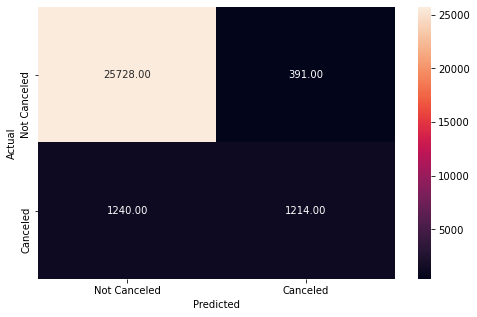

In [44]:

y_pred_cv = xgb.predict(X_cv)
metrics_score(y_cv,y_pred_cv)

In [45]:
# xbg is better 
y_test_pred = xgb.predict(X_test)
data = {'Id' : test_id,
       'income_morethan_50K' : y_test_pred}

pd.DataFrame(data).to_csv('submission2.csv', index = False)